In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
G = nx.barabasi_albert_graph(100, 2) # 根据结果反推，这个函数的意思就是生成一百个节点，每个节点有两条边

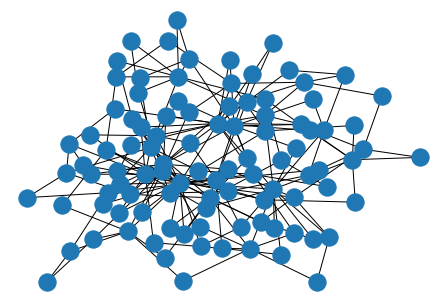

In [3]:
nx.draw_spring(G)

(array([77.,  9.,  4.,  6.,  1.,  1.,  1.,  0.,  0.,  1.]),
 array([ 2. ,  4.3,  6.6,  8.9, 11.2, 13.5, 15.8, 18.1, 20.4, 22.7, 25. ]),
 <BarContainer object of 10 artists>)

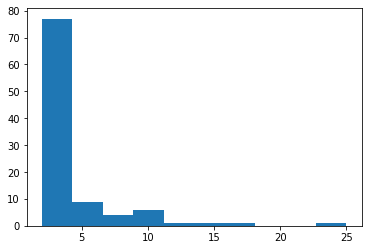

In [4]:
plt.hist([v for k,v in nx.degree(G)])

(array([82.,  9.,  6.,  0.,  1.,  1.,  0.,  0.,  0.,  1.]),
 array([0.        , 0.03345533, 0.06691065, 0.10036598, 0.13382131,
        0.16727663, 0.20073196, 0.23418729, 0.26764261, 0.30109794,
        0.33455326]),
 <BarContainer object of 10 artists>)

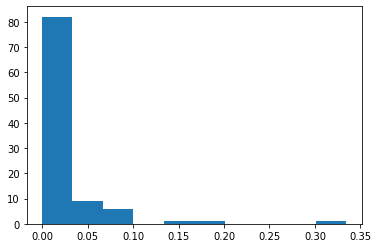

In [5]:
plt.hist(nx.centrality.betweenness_centrality(G).values()) # 查看各个区间的占比

In [6]:
nx.diameter(G)

6

In [7]:
nx.cluster.average_clustering(G) #  它关注的东西就是，a to b，b to c，则a有多大的概率能to c

0.13515139141903845

In [9]:
# 实际情况下，这种随机生成的无序数据并没有什么用处，我们更多的可能还是用pandas
# 这些对数据进行处理，然后用边的数据结合networkx生成所需要的实际有分析价值的图

nodes = list(range(100))

df = pd.DataFrame({'from': np.random.choice(nodes, 100),
                                  'to': np.random.choice(nodes, 100)
                  })

In [10]:
df

,from,to
0,40,42
1,54,49
2,13,51
3,20,81
4,74,30
...,...,...
95,16,29
96,14,69
97,50,63
98,58,18


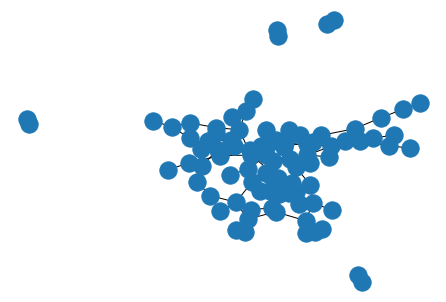

In [12]:
# 可以把上面这个称为edge list
G = nx.from_pandas_edgelist(df, source = 'from', target = 'to')
nx.draw_spring(G)

(array([31., 28., 14.,  0.,  8.,  5.,  0.,  1.,  0.,  1.]),
 array([1. , 1.7, 2.4, 3.1, 3.8, 4.5, 5.2, 5.9, 6.6, 7.3, 8. ]),
 <BarContainer object of 10 artists>)

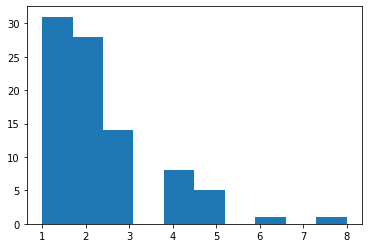

In [13]:
plt.hist([v for k,v in nx.degree(G)])

In [14]:
# https://www.zhihu.com/search?type=content&q=networkx

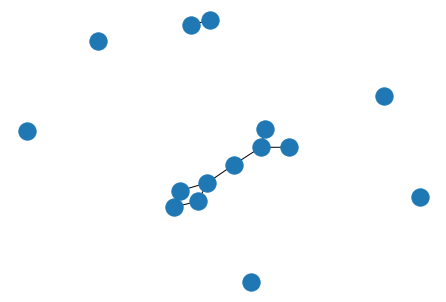

In [27]:
import networkx as nx 
G = nx.Graph()
G.add_node(1)
G.add_node('A')

G.add_nodes_from([2, 3]) # 同时加2和3两个节点

G.add_edges_from([(1,2),(1,3),(2, 4), (2, 5),(3,6),(4,8), (5,8),(3,7)]) # 之前还没有添加上的节点，也会根据这个函数直接对途中内容进行修改

H = nx.path_graph(10)
G.add_nodes_from(H)
G.add_node(H)

G.add_node('a')
G.add_edge('x', 'y')


nx.draw_spring(G)

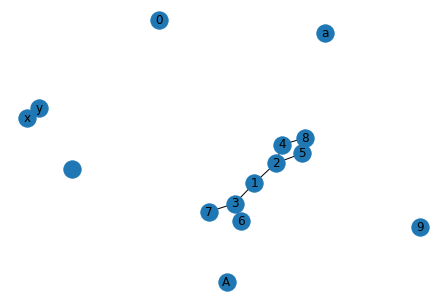

In [31]:
H = nx.path_graph(10)
G.add_nodes_from(H)
nx.draw(G, with_labels = True)
plt.show()

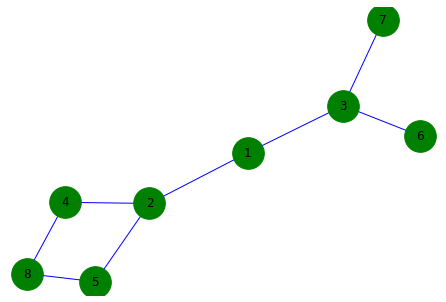

In [35]:
G = nx.Graph()
# 导入所有边，每条边分别用tuple表示
G.add_edges_from([(1,2), (1,3), (2,4),(2,5),(3,6),(4,8),(5,8),(3,7)])

nx.draw(G, with_labels = True, edge_color= 'b',node_color= 'g', node_size = 1000)
plt.show()

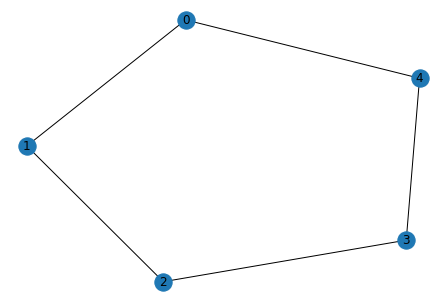

In [39]:
# 构造环路

G = nx.Graph()
nx.add_cycle(G,[0,1,2,3,4])
nx.draw(G, with_labels = True)
plt.show()

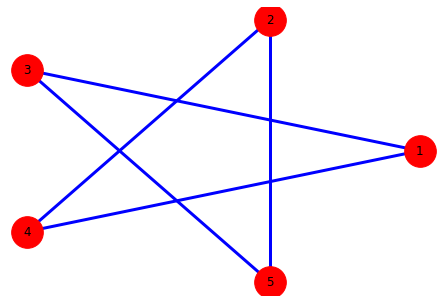

In [53]:
# 画个五角星
G = nx.Graph()
G.add_node(1)
G.add_nodes_from([2,3,4,5])
for i in range(5):
    for j in range(i):
        if (abs(i-j) not in (1,4)):
            G.add_edge(i+1,j+1)
nx.draw(G,
              with_labels=True, # 这个选项让节点有名称
              pos = nx.circular_layout(G), # 这个是选择节点的排列方式
              edge_color = 'b',
              node_color='r',
              node_size = 1000,
              width = 3,)
plt.show()

{(0, 4): 0.6284768776397998, (0, 6): 0.45951936216227673, (1, 2): 0.11227017365599234, (1, 4): 0.3016893750365832, (2, 3): 0.9714065737219895, (3, 4): 0.6015189879051316, (3, 5): 0.8092247307050868, (3, 6): 0.9258790912403332, (3, 7): 0.47350964986263955, (4, 8): 0.9710175250501719, (5, 7): 0.7298388132414819, (6, 9): 0.7088409633873923, (7, 9): 0.6626345261758109}


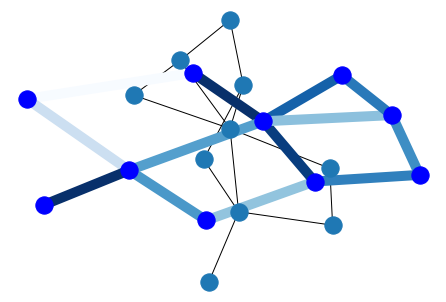

In [62]:
import random

G = nx.gnp_random_graph(10, 0.3)
nx.draw(G)
for u,v,d in G.edges(data = True):
    d['weight'] = random.random()

print(nx.get_edge_attributes(G, 'weight'))
    
edges, weights = zip(*nx.get_edge_attributes(G, 'weight').items())

pos = nx.spring_layout(G)
nx.draw(G, pos, node_color = 'b', edgelist = edges, edge_color = weights, width = 10.0, edge_cmap = plt.cm.Blues )
# 颜色的深浅也代表了节点之间权重的差异

plt.show()

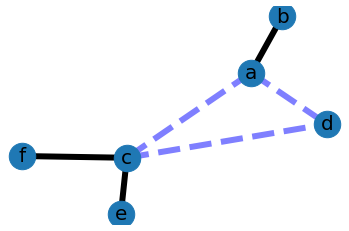

In [73]:
# 加入权重

G = nx.Graph()

G.add_edge('a', 'b', weight = 0.6)
G.add_edge('a', 'c', weight = 0.2)
G.add_edge('c','d', weight = 0.1)
G.add_edge('c','e',weight = 0.7)
G.add_edge('c','f',weight = 0.9)
G.add_edge('a','d',weight = 0.3)

elarge = [(u,v) for (u, v, d) in G.edges(data=True) if d['weight'] > 0.5]
esmall = [(u,v) for (u, v, d) in G.edges(data = True) if d['weight'] <=0.5] 
# 将边的类型进行一定的划分

pos = nx.spring_layout(G) # positions for all nodes

# nodes
nx.draw_networkx_nodes(G, pos, node_size = 700)

nx.draw_networkx_edges(G, pos, edgelist=elarge,width=6) # 只画满足edgelist中的edge

nx.draw_networkx_edges(G,pos, edgelist=esmall,
                      width = 6, alpha = 0.5, edge_color='b', style = 'dashed')


# labels
nx.draw_networkx_labels(G, pos,font_size=20,
                        font_family = 'sans-serif')

# nx.draw(G,with_label=True)

plt.axis("off")
plt.show()

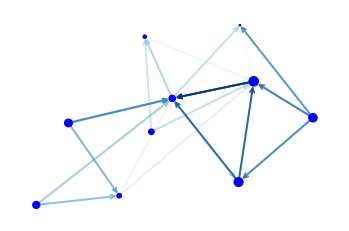

In [78]:
# 有向图
from __future__ import division
G = nx.generators.directed.random_k_out_graph(10,3,0.5)
pos = nx.layout.spring_layout(G)

node_sizes = [3+10 *i for i in range(len(G))]
M = G.number_of_edges()

edge_colors = range(2, M+2)
edge_alphas = [(5+i) / (M+4) for i in range(M)]

nodes = nx.draw_networkx_nodes(G, pos,node_size = node_sizes, node_color='blue')
edges = nx.draw_networkx_edges(G, pos, node_size = node_sizes, arrowstyle = '->',
                              arrowsize=10, edge_color = edge_colors, edge_cmap = plt.cm.Blues,width = 2)

# set alpha value for each edge
for i in range(M):
    edges[i].set_alpha(edge_alphas[i])
    
ax = plt.gca()
ax.set_axis_off()
plt.show()

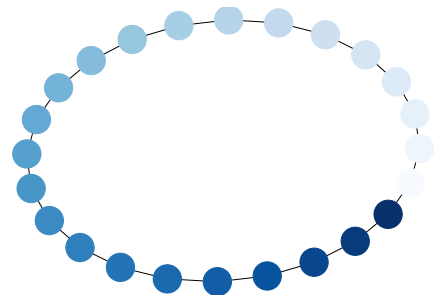

In [80]:
# 颜色渐变的节点
G = nx.cycle_graph(24)
pos = nx.spring_layout(G, iterations = 200)

nx.draw(G, pos, node_color = range(24), node_size = 800, cmap = plt.cm.Blues)

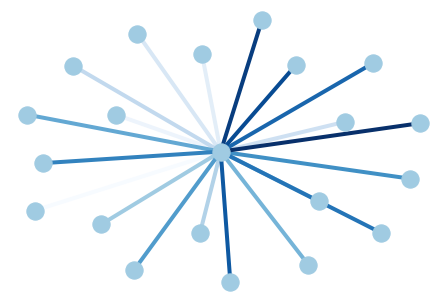

In [84]:
# 颜色渐变的边

G = nx.star_graph(20)
pos = nx.spring_layout(G)
colors = range(20)
nx.draw(G, pos, node_color= '#A0CBE2', edge_color = colors,
       width =4,edge_cmap = plt.cm.Blues, with_labels = False)

plt.show()

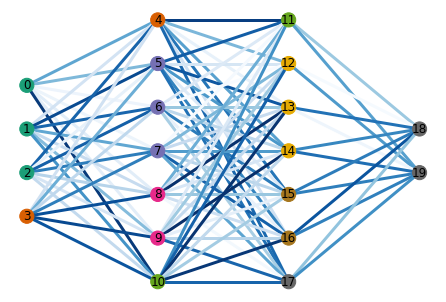

In [86]:
# 画一个多层感知机

import random

left, right, bottom, top, layer_sizes = .1, .9, .1, .9, [4, 7, 7, 2]

G = nx.Graph()
v_spacing = (top - bottom) / float(max(layer_sizes))
h_spacing = (right - left) / float(len(layer_sizes) - 1)
node_count = 0
for i,v in enumerate(layer_sizes):
    layer_top = v_spacing*(v-1)/2. +(top + bottom)/2.
    for j in range(v):
        G.add_node(node_count, pos=(left + i*h_spacing, layer_top - j*v_spacing))
        node_count += 1

for x, (left_nodes, right_nodes) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
    for i in range(left_nodes):
        for j in range(right_nodes):
            G.add_edge(i + sum(layer_sizes[:x]), j + sum(layer_sizes[:x+1]))

pos = nx.get_node_attributes(G,'pos')

# 把每个节点中的pos位置信息导出
nx.draw(G, pos,
       node_color = range(node_count),
       with_labels = True,
       node_size = 200,
       edge_color = [random.random() for i in range(len(G.edges))],
       width = 3,
       cmap = plt.cm.Dark2,
       edge_cmap = plt.cm.Blues)

plt.show()